In [191]:
from torch_geometric.datasets import Planetoid
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
#import matplotlib.pyplot as plt
import pylab as plt
import pickle
import sys
import numpy as np
from scipy import interpolate

from GNM_Toolbox.data.dataloader import *

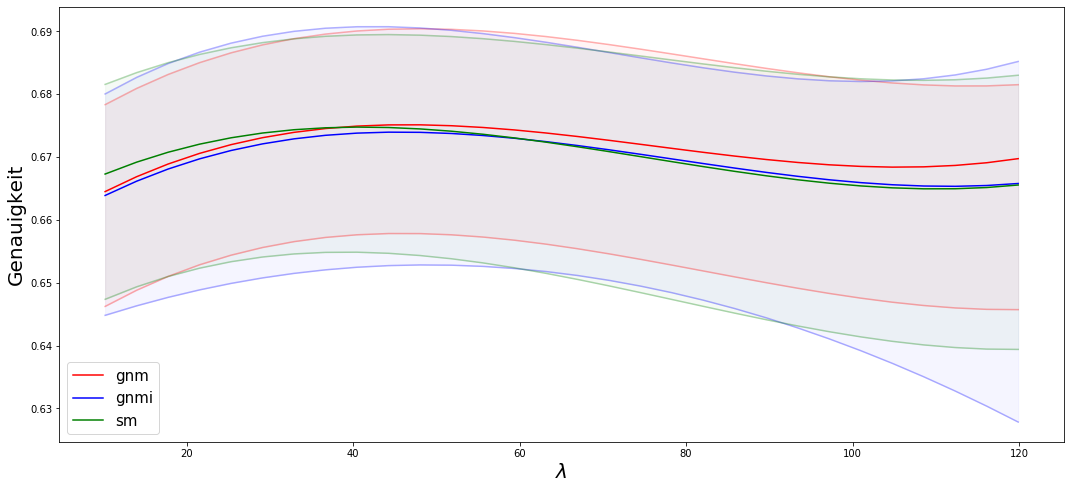

In [337]:
all_models = pickle_read('algorithm-analysis-citeseer-6.pkl')
all_models0 = dict()
all_models_times = dict()
for key in all_models.keys():
    models = all_models[key]
    if key == 'sm':
        all_models0[key] = np.array(models)
    else:
        models2 = list()
        models_time = list()
        for model in models:
            models2.append(np.array(model)[:2])
            models_time.append(model[2])
            
        all_models0[key] = np.array(models2)
        all_models_times[key] = np.array(models_time)
        
plot_data(all_models0, ['red', 'blue', 'green'])

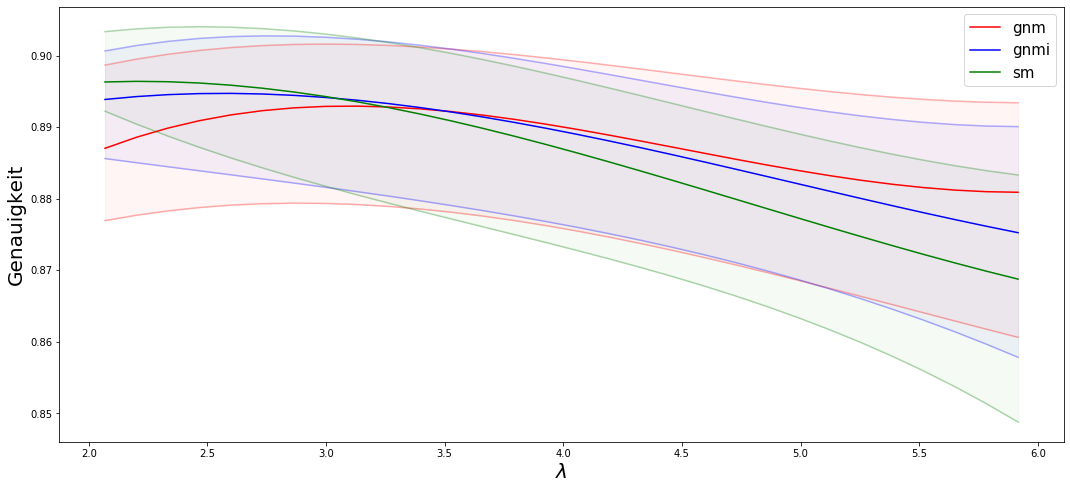

In [336]:
all_models = pickle_read('algorithm-analysis-citeseer-2.pkl')
plot_data(all_models, ['red', 'blue', 'green'])

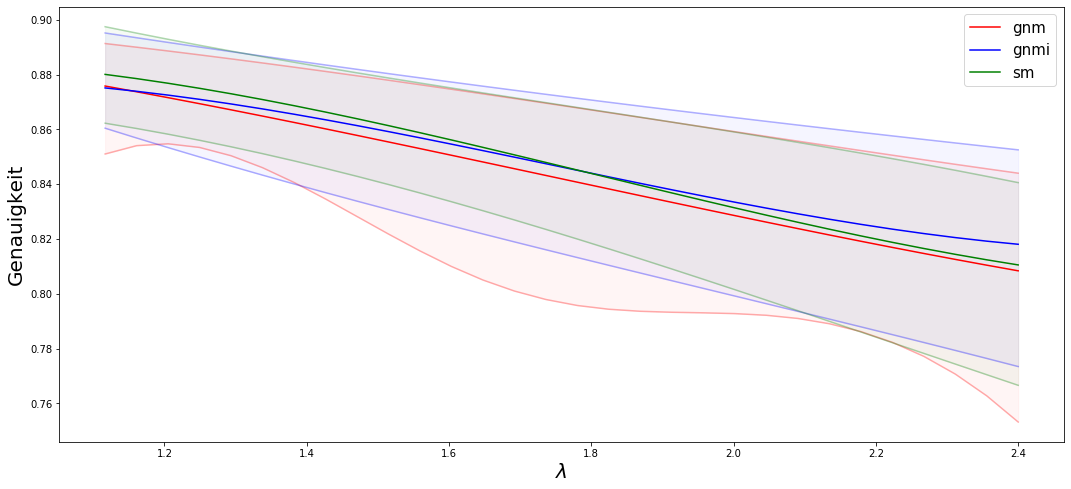

In [335]:
all_models = pickle_read('algorithm-analysis-cora0.pkl')
plot_data(all_models, ['red', 'blue', 'green'])

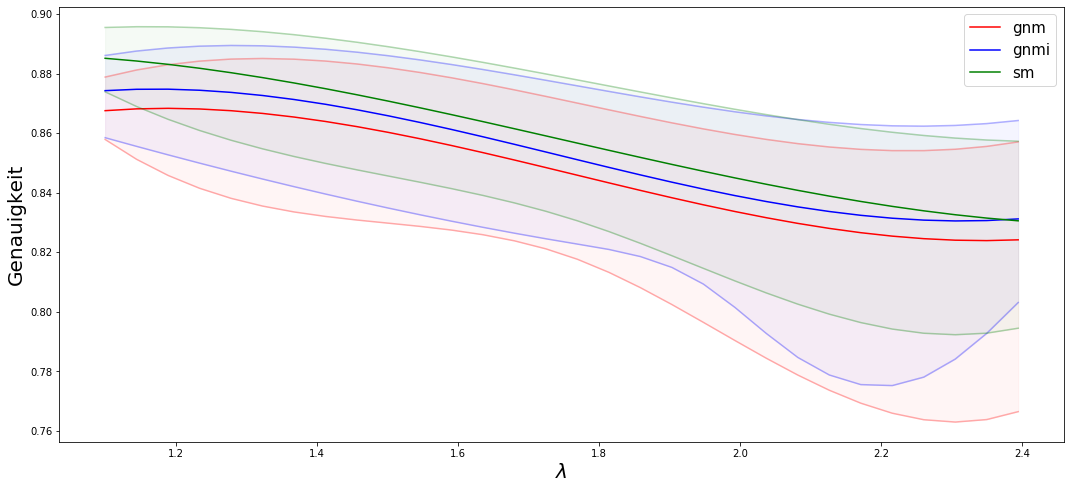

In [334]:
all_models = pickle_read('algorithm-analysis-cora.pkl')
plot_data(all_models, ['red', 'blue', 'green'])

In [333]:
def var(l, mean):
    # l: list of floats, 
    # mean: float
    return np.mean((l-mean)**2)

def plot_data(all_models, colors):
    names = list(all_models.keys())
    M = len(names)
    
    plt.figure(None, (18, 8))
    
    for name, color in zip(names, colors):
        # print point cloud
        data = np.array(all_models[name]).T
        #plt.plot(*data, 'x', alpha = 1, color=color)
        
        # print mean function
        lambdas = data[0]
        values = data[1]
        mini = np.min(lambdas)
        maxi = np.max(lambdas)
        width = (maxi-mini)/5
        xn = np.linspace(mini, maxi, 30)
        yn_mean = np.zeros_like(xn)
        yn_lower_var = np.zeros_like(xn)
        yn_upper_var = np.zeros_like(xn)
        for i in range(len(xn)):
            ys = list()
            # Find all values in given interval [xn[i] +- width/2]
            for j in range(len(values)):
                if lambdas[j] <= xn[i] + width/2 and lambdas[j] >= xn[i] - width/2:
                    ys.append(values[j])
            ys = np.sort(ys)
            mean = np.mean(ys)
            ys_lower = [y for y in ys if y < mean]
            ys_upper = [y for y in ys if y > mean]
            
            yn_mean[i] = mean
            yn_lower_var[i] = np.sqrt(var(ys_lower, mean))
            yn_upper_var[i] = np.sqrt(var(ys_upper, mean))
            
            
        mean_spline = interpolate.UnivariateSpline(xn, yn_mean)
        var_upper_spline = interpolate.UnivariateSpline(xn, yn_mean + yn_upper_var)
        var_lower_spline = interpolate.UnivariateSpline(xn, yn_mean - yn_lower_var)
        mean_spline.set_smoothing_factor(0.001)
        var_upper_spline.set_smoothing_factor(0.001)
        var_lower_spline.set_smoothing_factor(0.001)
        
        #plt.plot(xn, yn_mean, color=color, label=name)
        plt.plot(xn, mean_spline(xn), color=color, label=name)
        
        plt.plot(xn, var_lower_spline(xn), alpha=0.3, color=color)
        plt.plot(xn, var_upper_spline(xn), alpha=0.3, color=color)
        plt.fill_between(xn, var_lower_spline(xn), var_upper_spline(xn), alpha=0.04, color=color)

    plt.legend(fontsize=15)
    plt.xlabel(r'$\lambda$', fontsize=20)
    plt.ylabel(r'Genauigkeit', fontsize=20)